# Exploratory Data Analysis (EDA) - Understanding Data for Better Insights
_Author: Laiza Milena Scheid Parizotto_

It involves examining and visualizing the data to gain insights, discover patterns, and identify potential relationships between variables.The importance of EDA lies in its ability to provide a deeper understanding of the dataset, uncover hidden patterns, and guide subsequent steps in the analysis process. 

This EDA will follow:

1. **Discover Data Quality Issues**: identify missing values or inconsistencies in the dataset. Understanding data quality issues allows for appropriate data cleaning and preprocessing steps.

2. **Understand Variable Distributions**: By analyzing the distributions of variables, such as the target variable ("Exited"), we can assess class imbalances and determine the need for techniques like data resampling.

3. **Uncover Patterns and Relationships**: identification of correlations, dependencies, or trends between variables. This information helps select relevant features for modeling and enables the formulation of hypotheses about the underlying dynamics.

4. **Detect Anomalies and Outliers**: detection of anomalies or outliers that could impact the performance of the predictive model. By understanding these anomalies, appropriate treatment can be applied, such as removing outliers or using robust modeling techniques.

5. **Communicate Findings Effectively**: conclusions and concise insights about the dataset. Guidelines for feature engineering. 

In [1]:
from utils.utils import format_seaborn_plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**But first, lets check the data :)**

In [2]:
# Read the data from a CSV file
df = pd.read_csv('../data/01_raw/abandono_clientes.csv')
df_exited = df.loc[df["Exited"]==1]
df_not_exited = df.loc[df["Exited"]==0]

# Display the first few rows of the dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


> This is a binary classification problem, where the target variable is "Exited".
> From now on, I will call **Exited** when *"Exited" is 1*, and **Not Exited** when *"Exited" is 0*.

## 1. Discover Data Quality Issues

The goal is to verify **Data integrity**.

>*check data formats*

> *identify missing values*

> *identify duplicate entries*

In [3]:
# Information of type in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Summary statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


> From this results we can check that there are <span style="background-color:lightgray">no missing values</span> and identify the <span style="background-color:lightgray">type</span> of each feature.

## 2. Understand Target Variable Distribution
> Check for data imbalance

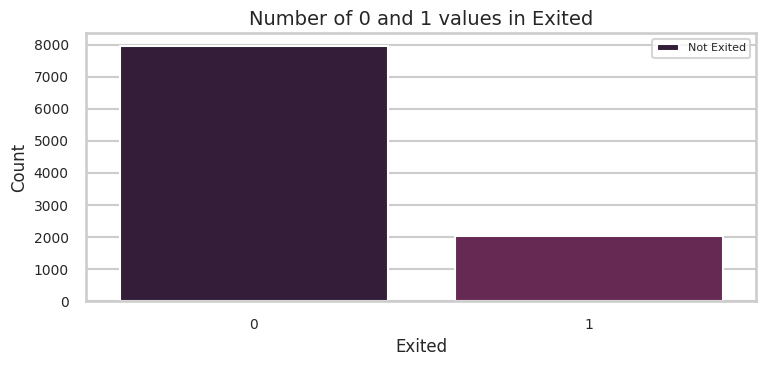

In [13]:
# Data balance between target variable
format_seaborn_plots()

sns.countplot(data=df, x='Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Number of 0 and 1 values in Exited')
plt.legend(['Not Exited'])


plt.show()

From this chart we can verify that the data is <span style="background-color:lightgray">not balanced</span>.

This imbalance should be considered for the entire EDA. Special attention for charts with absolute value and counts.

<span style='color:white; background-color:#35193e'>Consideration for feature engineering:</span>
- It's important to handle class imbalance appropriately to avoid biased model performance and ensure fair and accurate predictions for both classes.

- Techniques such as oversampling the minority class, undersampling the majority class, or using algorithms specifically designed for imbalanced data can be employed to mitigate the effects of class imbalance.


## 3. Uncover Patterns and Relationships


### 3.1 Correlation Analysis

> The importance of correlation analysis in binary classification problems lies in understanding the relationship between predictor variables and the target variable. It helps identify which features are most influential in predicting the target class, allowing for feature selection or engineering. Additionally, correlation analysis helps identify and eliminate possible correlated features, reducing redundancy and improving the model's interpretability and performance.

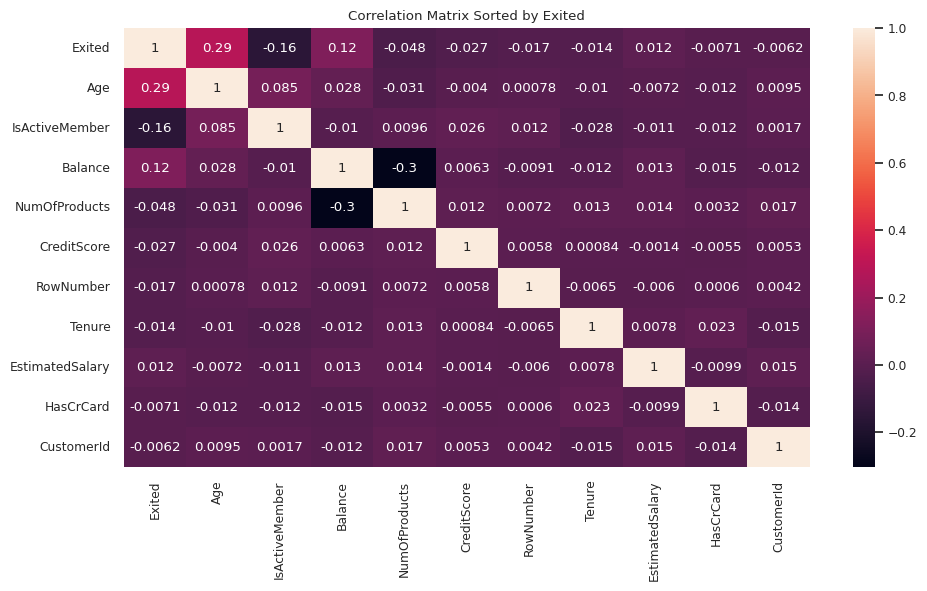

In [14]:
# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Sort correlation matrix based on correlation with "Exited" column
corr_with_exited = corr_matrix['Exited'].abs().sort_values(ascending=False)
corr_matrix_sorted = corr_matrix.loc[corr_with_exited.index, corr_with_exited.index]

# Plot correlation heatmap
format_seaborn_plots()
sns.set(font_scale=0.8)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix_sorted, annot=True)
plt.title('Correlation Matrix Sorted by Exited')
plt.show()

> From the correlation matrix we can check that <span style="background-color:#d96c64">"CustomerId"</span> is irrelevant to the Exited output. And that <span style="background-color:#77b072">Age</span>, <span style="background-color:#77b072">IsActiveMember</span> and <span style="background-color:#77b072">Balance</span> are the most correlated features with the target <span style="background-color:lighgray">Exited</span>. 

### 3.2 Analysis of each feature

> Understand each feature of the dataset and its relation with the target variable.

#### Age

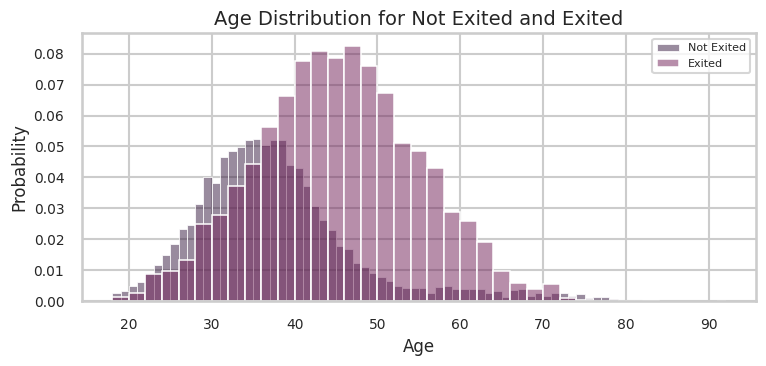

In [18]:
format_seaborn_plots()

# Plot the histograms
sns.histplot(data=df_not_exited, x='Age', label='Not Exited', alpha=0.5, stat="probability")
sns.histplot(data=df_exited, x='Age', label='Exited', alpha=0.5, stat="probability")

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Age Distribution for Not Exited and Exited')

# Add legend
plt.legend()

# Show the plot

> From this analisys it is possible to identify that <span style="background-color:#77b072">customers that **Exited** the bank are **older**.</span>

In [22]:
# Calculate z-scores
z_scores = np.abs((df['Age'] - df['Age'].mean()) / df['Age'].std())

# Define threshold for outlier detection
threshold = 3

# Identify outliers
outliers = df[z_scores > threshold]

# Print the outliers
#print(outliers)

df2 =df.drop(outliers.index)
df2_exited = df2[df2['Exited']==1]
df2_not_exited = df2[df2['Exited']==0]

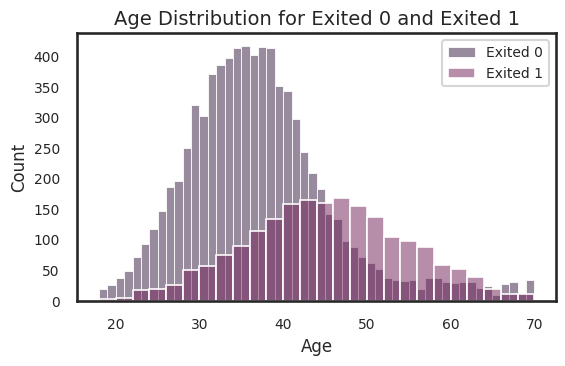

In [23]:
format_seaborn_plots()

# Plot the histograms
sns.histplot(data=df2_not_exited, x='Age', label='Exited 0', alpha=0.5)
sns.histplot(data=df2_exited, x='Age', label='Exited 1', alpha=0.5)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution for Exited 0 and Exited 1')

# Add legend
plt.legend()

# Show the plot

#### Is Active Member

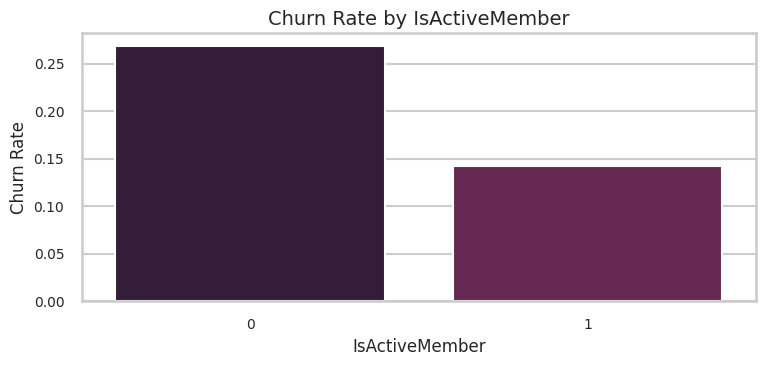

In [19]:
format_seaborn_plots()

# Calculate churn rate for IsActiveMember categories
churn_rate = df.groupby('IsActiveMember')['Exited'].mean()

# Plot churn rate bar plot
sns.barplot(x=churn_rate.index, y=churn_rate.values)
plt.xlabel('IsActiveMember')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by IsActiveMember')
plt.show()

> From the churn rate we can verify that <span style="background-color:#77b072">Active Members are less likely to leave the bank.</span>

#### Balance

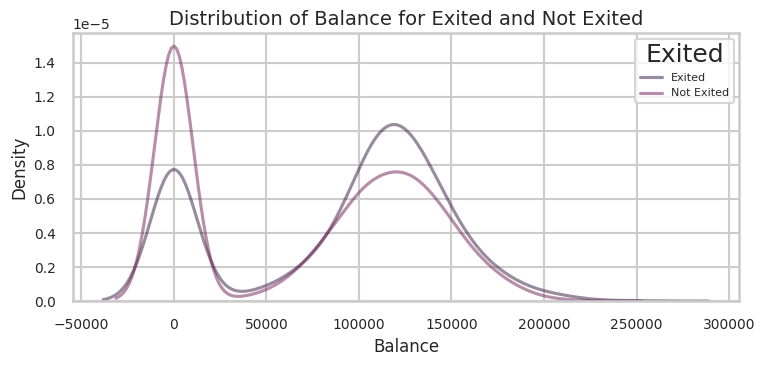

In [21]:
format_seaborn_plots()

# Plot histogram for Balance column
sns.kdeplot(data=df_exited, x='Balance', label='Exited', alpha=0.5)
sns.kdeplot(data=df_not_exited, x='Balance', label='Not Exited', alpha=0.5)

plt.xlabel('Balance')
plt.ylabel('Density')
plt.title('Distribution of Balance for Exited and Not Exited')
plt.legend(title='Exited')

plt.show()

> The "Balance" feature itself may not directly indicate churn.

<span style='color:white; background-color:#35193e'>Consideration for feature engineering:</span>

It can be used in combination with other features to create more informative predictors. For example, you can create new features such as "Balance-to-Income Ratio" or other features to capture additional aspects of customers' financial behavior, which might be indicative of their likelihood to Exit the bank.

#### Number of Products

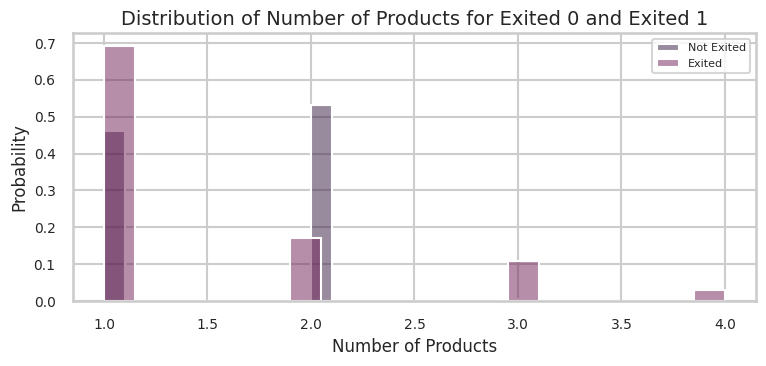

In [22]:
format_seaborn_plots()

# Plot the histograms as rates
sns.histplot(data=df_not_exited, x='NumOfProducts', label='Not Exited', alpha=0.5, stat="probability")
sns.histplot(data=df_exited, x='NumOfProducts', label='Exited', alpha=0.5, stat="probability")

# Set plot labels and title
plt.xlabel('Number of Products')
plt.ylabel('Probability')
plt.title('Distribution of Number of Products for Exited 0 and Exited 1')

# Add legend
plt.legend()

# Show the plot
plt.show()

> From the information above, we can check the probability distribution of the number of products for customers that Exited and Not Exited the bank.

**Highlights**: 
 - Most customers that Exited the bank had 1 product.
 - Most customers that Not Exited the bank had 1 or 2 products.
 - Clients that have 3 or 4 products generally Exited the bank.

<span style='color:white; background-color:#35193e'>Consideration for feature engineering:</span>

This column could be transformed into a cathegorical feature. This could be done because the absolute value is not related to the probability of churn. higher number of products dont represent higher probability of churn. This aspect could enhance model performance.

#### Credit Score

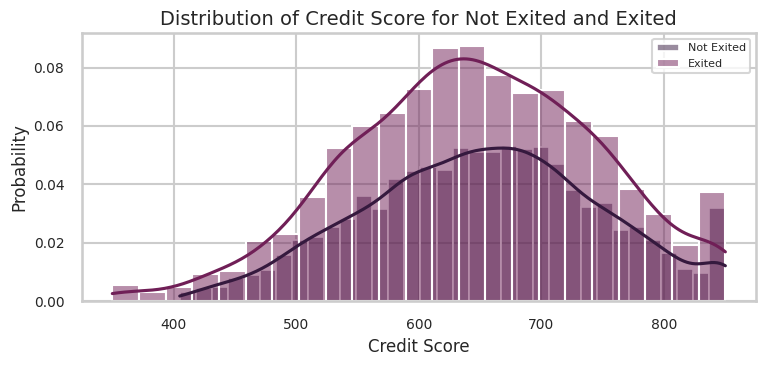

In [25]:
format_seaborn_plots()

# Plot the histograms as rates
sns.histplot(data=df_not_exited, x='CreditScore', label='Not Exited', alpha=0.5, stat="probability", kde=True)
sns.histplot(data=df_exited, x='CreditScore', label='Exited', alpha=0.5, stat="probability", kde=True)

# Set plot labels and title
plt.xlabel('Credit Score')
plt.ylabel('Probability')
plt.title('Distribution of Credit Score for Not Exited and Exited')

# Add legend
plt.legend()

# Show the plot
plt.show()

> The chart above represents the distribuition of credit score for customers that Exited and Not Exited the bank.

The conclusions are not straightfoward, but **it could be infered** that:
- Customers that Exited the Bank tend to have a lower Credit Score than customers that Not Exited the bank.

<span style='color:white; background-color:#35193e'>Consideration for feature engineering:</span>

- It could be arranged with other features to get more insightfull information about the customer financial profile.
- As it is a numerical variable, it should be considered scaling or binning the feature before aplying to a model.

#### Tenure

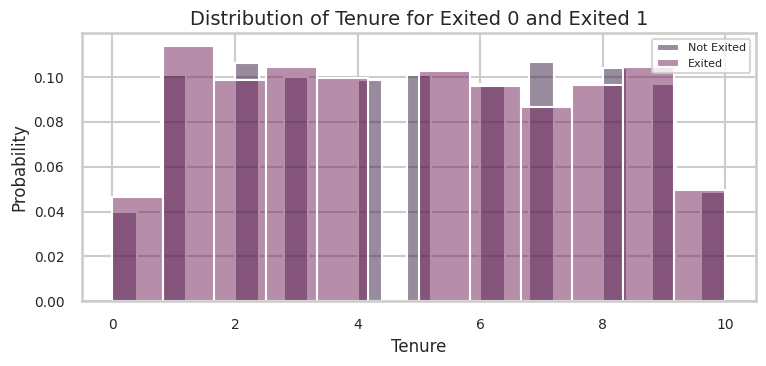

In [26]:
format_seaborn_plots()

# Plot the histograms as rates
sns.histplot(data=df_not_exited, x='Tenure', label='Not Exited', alpha=0.5, stat="probability")
sns.histplot(data=df_exited, x='Tenure', label='Exited', alpha=0.5, stat="probability")

# Set plot labels and title
plt.xlabel('Tenure')
plt.ylabel('Probability')
plt.title('Distribution of Tenure for Exited 0 and Exited 1')

# Add legend
plt.legend()

# Show the plot
plt.show()

> The chart above represents the feature "Tenure" which refers to the length of time a customer has been associated with a company or service. 

**Highlights**
- It should be expected from domain knowledge that this feature could provide relevant information about the probability of a customer to have Exited the bank, but this _**cannot be infered from the results of the chart above**_ and from the correlation matrix.
- But also from the correlation matrix we can check that this feature is correlated to other finantial aspects such as credit score and estimated salary. So it should be analyzed further the relation with that variables.

<span style='color:white; background-color:#35193e'>Consideration for feature engineering:</span>

- Could be transformed into cathegorical feature.
- Try to create new features by arranging with others. Possible potential with **Age**, as can be seen in the analysis below.

##### Tenure and Credit Score

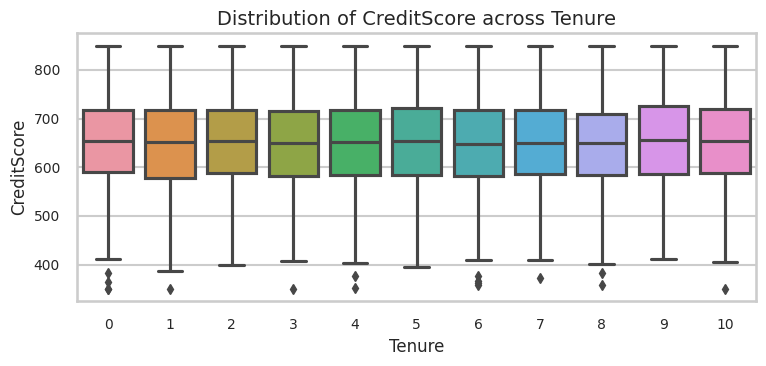

In [40]:
format_seaborn_plots()

sns.boxplot(data=df, x='Tenure', y='CreditScore')
plt.xlabel('Tenure')
plt.ylabel('CreditScore')
plt.title('Distribution of CreditScore across Tenure')
plt.show()

> I am not able to identify relevant linear relation between these two variables.

##### Tenure and Estimated Salary

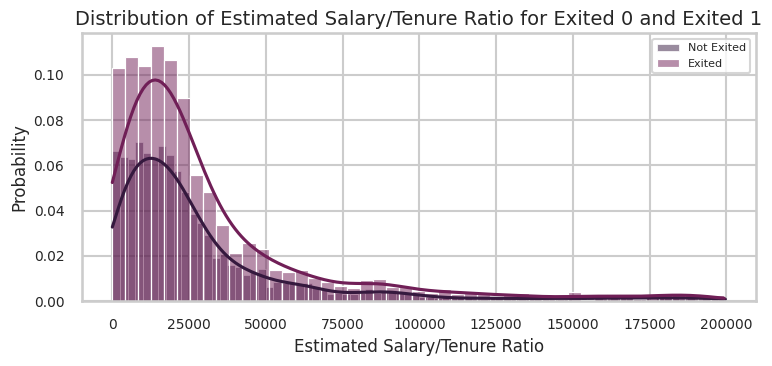

In [45]:
format_seaborn_plots()

df['EstimatedSalary_Tenure_Ratio'] = df['EstimatedSalary'] / df['Tenure']

# Plot histogram for 'EstimatedSalary_Tenure_Ratio' column for 'Exited' == 0
sns.histplot(data=df[df['Exited'] == 0], x='EstimatedSalary_Tenure_Ratio', label='Not Exited', alpha=0.5, stat='probability', kde=True)

# Plot histogram for 'EstimatedSalary_Tenure_Ratio' column for 'Exited' == 1
sns.histplot(data=df[df['Exited'] == 1], x='EstimatedSalary_Tenure_Ratio', label='Exited', alpha=0.5, stat='probability', kde=True)

# Set plot labels and title
plt.xlabel('Estimated Salary/Tenure Ratio')
plt.ylabel('Probability')
plt.title('Distribution of Estimated Salary/Tenure Ratio for Exited 0 and Exited 1')

# Add legend
plt.legend()

# Show the plot
plt.show()

##### Tenure and Age

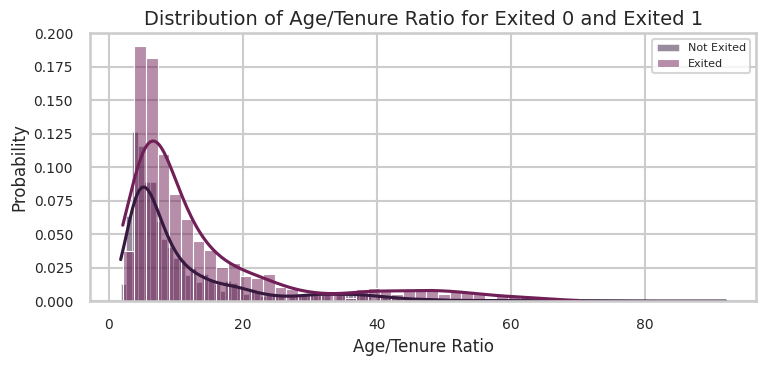

In [42]:
format_seaborn_plots()

df['Age_Tenure_Ratio'] = df['Age'] / df['Tenure']

# Plot histogram for 'Age_Tenure_Ratio' column for 'Exited' == 0
sns.histplot(data=df[df['Exited'] == 0], x='Age_Tenure_Ratio', label='Not Exited', alpha=0.5, stat='probability', kde=True)

# Plot histogram for 'Age_Tenure_Ratio' column for 'Exited' == 1
sns.histplot(data=df[df['Exited'] == 1], x='Age_Tenure_Ratio', label='Exited', alpha=0.5, stat='probability', kde=True)

# Set plot labels and title
plt.xlabel('Age/Tenure Ratio')
plt.ylabel('Probability')
plt.title('Distribution of Age/Tenure Ratio for Exited 0 and Exited 1')

# Add legend
plt.legend()

# Show the plot
plt.show()

> From the chart above we see that <span style="background-color:#77b072">there is a potential in combining Age and Tenure</span> as a new feature.

#### Estimated Salary

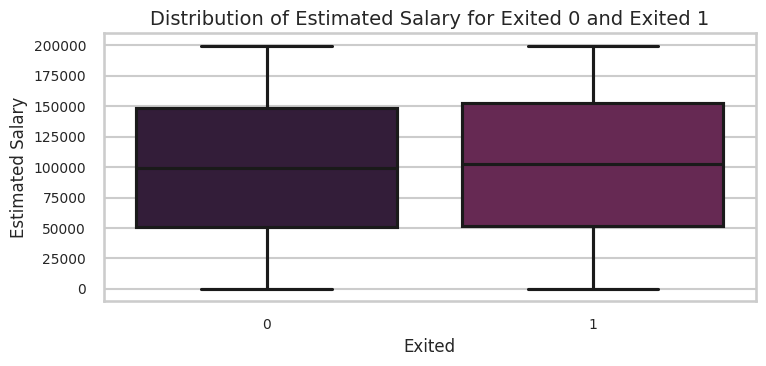

In [46]:
format_seaborn_plots()

# Create boxplot
sns.boxplot(data=df, x='Exited', y='EstimatedSalary')
plt.xlabel('Exited')
plt.ylabel('Estimated Salary')
plt.title('Distribution of Estimated Salary for Exited 0 and Exited 1')

# Show the plot
plt.show()


> From the chart above we can see that the Estimated Salary alone don't provide much information for the churn prediction.

<span style='color:white; background-color:#35193e'>Consideration for feature engineering:</span>
- Scailing or binning the varible.


##### Estimated Salary and Credit Score

> Not clear relation with the variables, also no clear non linear relation.

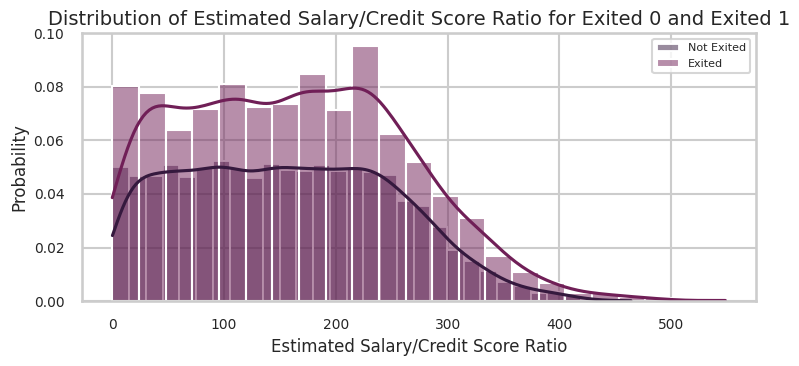

In [47]:
format_seaborn_plots()

df['EstimatedSalary_CreditScore_Ratio'] = df['EstimatedSalary'] / df['CreditScore']

# Plot histogram for 'EstimatedSalary_CreditScore_Ratio' column for 'Exited' == 0
sns.histplot(data=df[df['Exited'] == 0], x='EstimatedSalary_CreditScore_Ratio', label='Not Exited', alpha=0.5, stat='probability', kde=True)

# Plot histogram for 'EstimatedSalary_CreditScore_Ratio' column for 'Exited' == 1
sns.histplot(data=df[df['Exited'] == 1], x='EstimatedSalary_CreditScore_Ratio', label='Exited', alpha=0.5, stat='probability', kde=True)

# Set plot labels and title
plt.xlabel('Estimated Salary/Credit Score Ratio')
plt.ylabel('Probability')
plt.title('Distribution of Estimated Salary/Credit Score Ratio for Exited 0 and Exited 1')

# Add legend
plt.legend()

# Show the plot
plt.show()


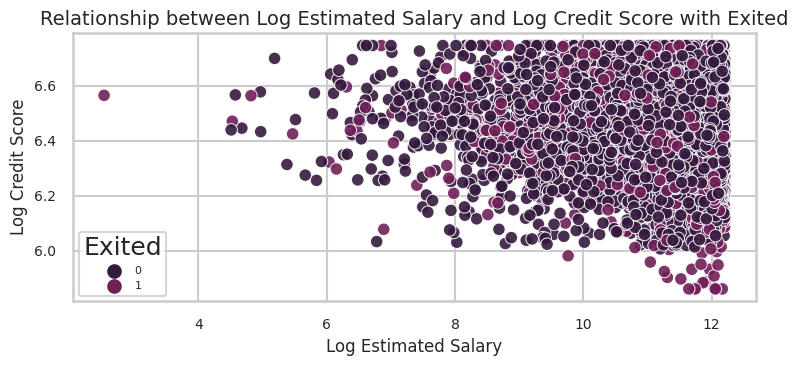

In [54]:
format_seaborn_plots()

# Apply logarithmic transformation to 'EstimatedSalary' and 'CreditScore'
df['LogEstimatedSalary'] = np.log1p(df['EstimatedSalary'])
df['LogCreditScore'] = np.log1p(df['CreditScore'])

# Scatter plot of 'LogEstimatedSalary' vs 'LogCreditScore' with hue='Exited'
sns.scatterplot(data=df, x='LogEstimatedSalary', y='LogCreditScore', hue='Exited', alpha=.9)

# Set plot labels and title
plt.xlabel('Log Estimated Salary')
plt.ylabel('Log Credit Score')
plt.title('Relationship between Log Estimated Salary and Log Credit Score with Exited')

# Show the plot
plt.show()

##### Has a Credit Card

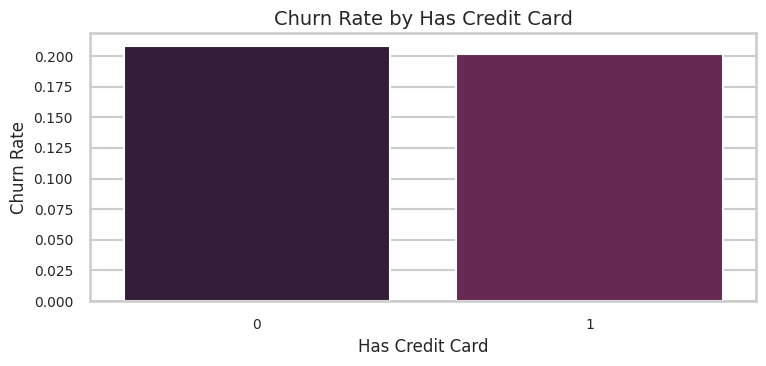

In [55]:
format_seaborn_plots()

# Calculate the churn rate for each category of HasCrCard
churn_rate_df = df.groupby('HasCrCard')['Exited'].mean().reset_index(name='Churn Rate')

# Create bar plot
sns.barplot(data=churn_rate_df, x='HasCrCard', y='Churn Rate')

# Set plot labels and title
plt.xlabel('Has Credit Card')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Has Credit Card')

# Show the plot
plt.show()

**HasCrCard, IsActiveMember and Exited**

> No relevant relation found

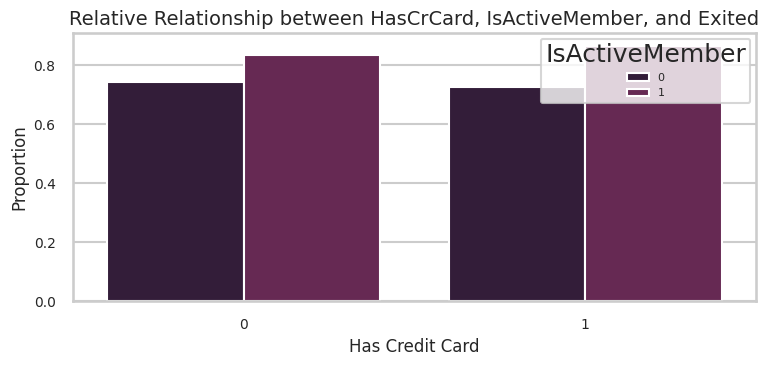

In [59]:
format_seaborn_plots()

# Group the data by 'HasCrCard', 'IsActiveMember', and 'Exited' and calculate the count
grouped_data = df.groupby(['HasCrCard', 'IsActiveMember', 'Exited']).size().reset_index(name='Count')

# Pivot the data to have 'Exited' as columns and 'Count' as values
pivot_data = grouped_data.pivot(index=['HasCrCard', 'IsActiveMember'], columns='Exited', values='Count').reset_index()

# Calculate the total count for each combination of 'HasCrCard' and 'IsActiveMember'
pivot_data['Total'] = pivot_data.sum(axis=1)

# Calculate the relative proportion of each 'Exited' category for each combination
for col in [0, 1]:
    pivot_data[col] = pivot_data[col] / pivot_data['Total']

# Plot the stacked bar plot
sns.barplot(data=pivot_data, x='HasCrCard', y=0, hue='IsActiveMember')

# Set plot labels and title
plt.xlabel('Has Credit Card')
plt.ylabel('Proportion')
plt.title('Relative Relationship between HasCrCard, IsActiveMember, and Exited')

# Show the plot
plt.show()

##### Geography

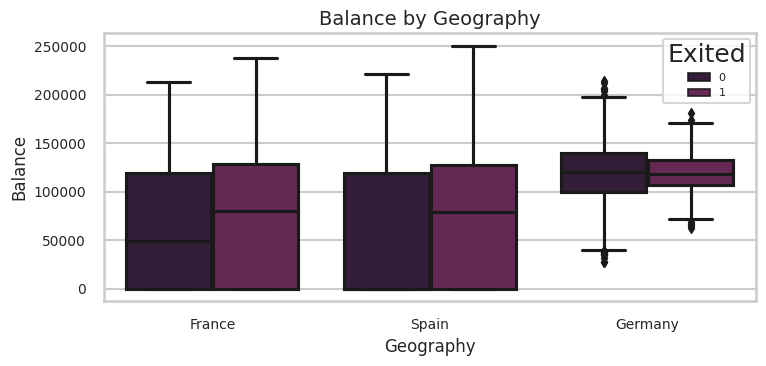

In [67]:
format_seaborn_plots()
sns.boxplot(x='Geography', y='Balance', data=df, hue='Exited')
plt.title('Balance by Geography')
plt.show()


> From the above chart it can be seen that the Balance varies significantly by Geography.

The feature "Geography" seems to bring relevant information for the prediction.

<span style='color:white; background-color:#35193e'>Consideration for feature engineering:</span>
- One-hot encoding: categorical feature.

## 4.Detect Anomalies and Outliers

### Outliers

> Outlier analysis using z-score is a statistical approach to identify and quantify outliers in a dataset. The **z-score** measures how many standard deviations an observation is away from the mean. By calculating the z-scores for each data point, we can determine which observations deviate significantly from the average. A commonly used threshold is a **z-score of 3**, where any data point exceeding this value is considered an outlier. This analysis helps us identify extreme values that may have a disproportionate impact on our analysis or indicate potential data quality issues. By understanding and addressing outliers, we can make informed decisions about how to handle them in subsequent data processing steps or modeling tasks.

In [71]:
# Calculate z-scores for each numerical float feature
df = pd.read_csv('../data/01_raw/abandono_clientes.csv')
z_scores = np.abs((df.select_dtypes(include=['float64', 'int']) - df.select_dtypes(include=['float64', 'int']).mean()) / df.select_dtypes(include='float64').std())

# Define a threshold for outlier detection
threshold = 3

# Identify outliers by checking if z-score exceeds the threshold
outliers = z_scores > threshold

# Print the number of outliers for each feature
for col in outliers.columns:
    num_outliers = outliers[col].sum()
    print(f"Number of outliers in {col}: {num_outliers}")

Number of outliers in Age: 0
Number of outliers in Balance: 0
Number of outliers in CreditScore: 0
Number of outliers in CustomerId: 0
Number of outliers in EstimatedSalary: 0
Number of outliers in Exited: 0
Number of outliers in HasCrCard: 0
Number of outliers in IsActiveMember: 0
Number of outliers in NumOfProducts: 0
Number of outliers in RowNumber: 0
Number of outliers in Tenure: 0


### Distribution Check with Test Set

> Monitoring the distribution of test data ensures the reliability, accuracy, and relevance of the machine learning model in real-world applications.
> - **Generalization**: By ensuring that the test data has a similar distribution to the training data, we can assess how well the model generalizes to new, unseen instances. It helps us validate the model's performance and identify any potential biases or issues.
> - **Concept Drift Detection**: Changes in the distribution of test data over time indicate concept drift. Monitoring the distribution allows us to detect and respond to such shifts, enabling model adaptation or retraining when necessary to maintain optimal performance.

For this specific problem, I will just **compare the distribution of the features in the train and test dataset**. As we are considering static data, this is not a big issue, but it should be considered for real-world application of machine learning models in production.

> <span style="background-color:#77b072">There are similar distributions for the features in each dataset.</span>

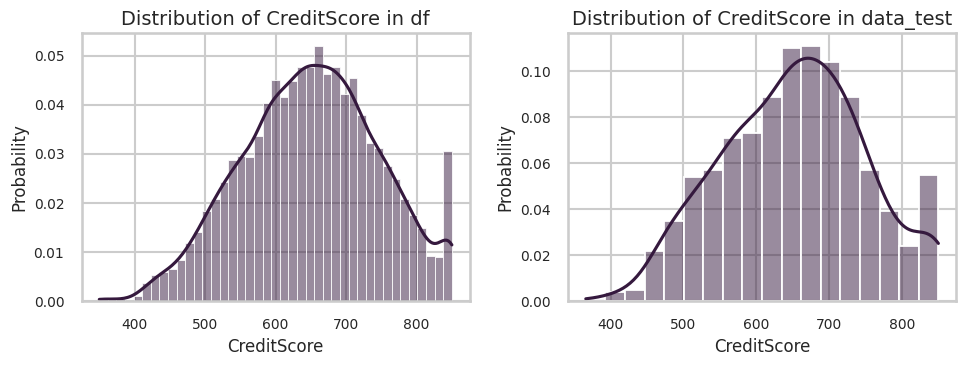

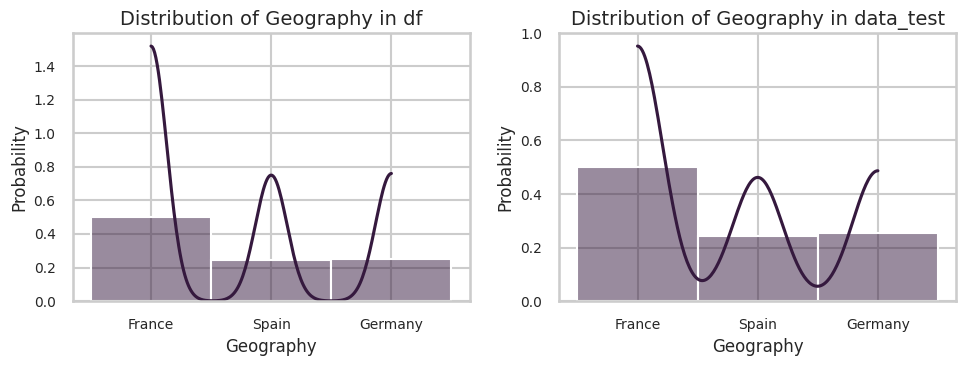

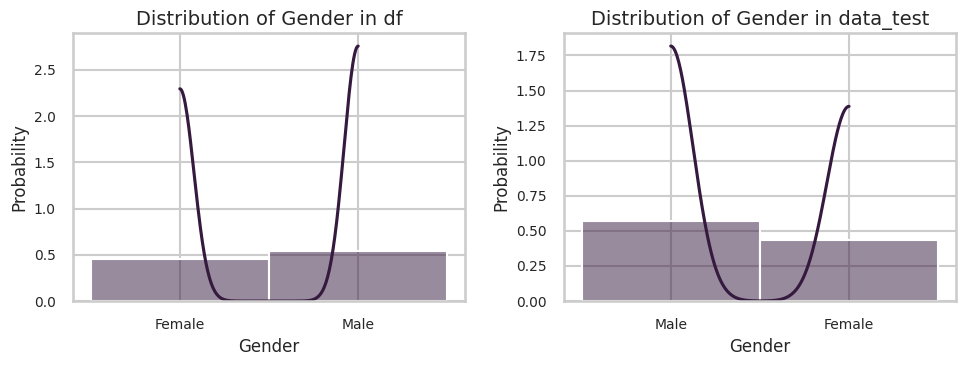

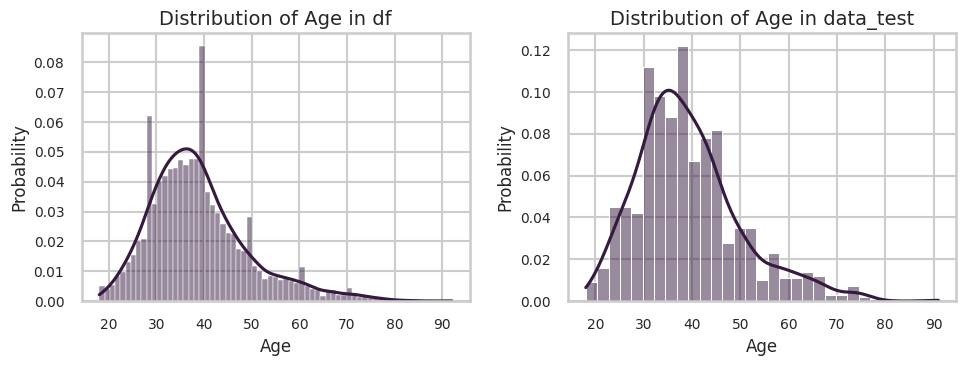

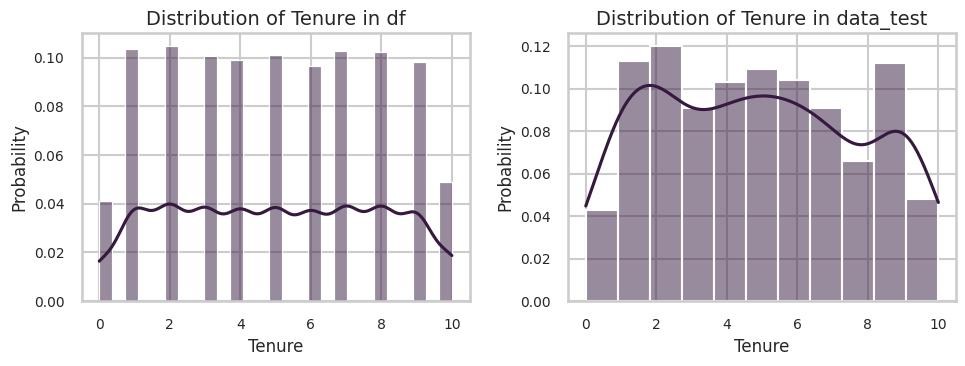

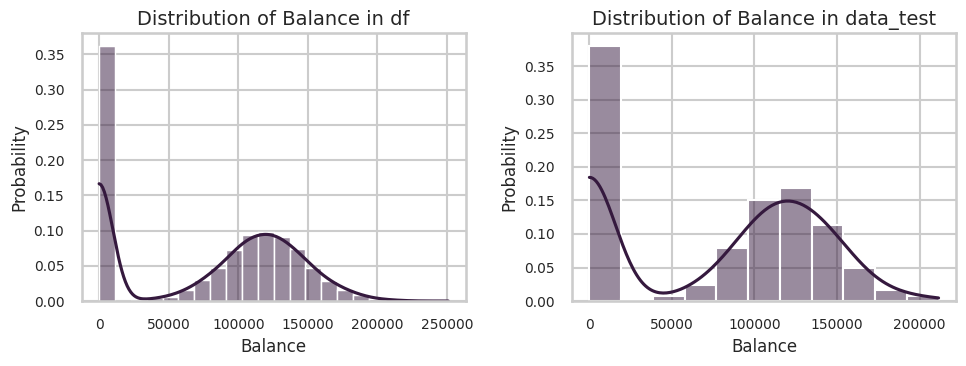

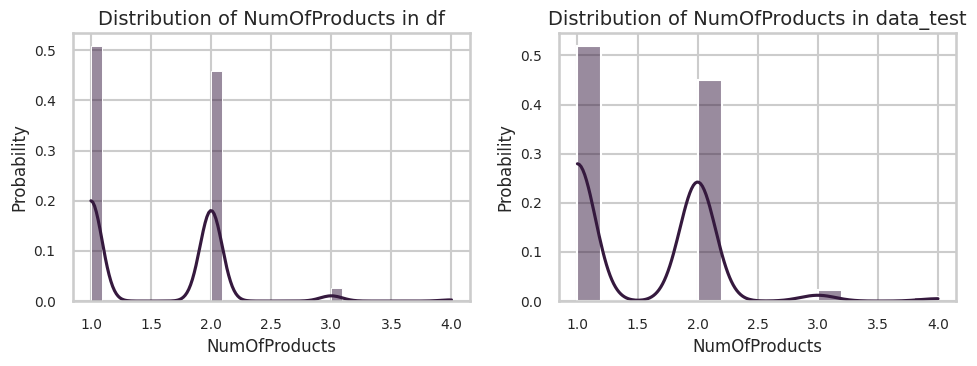

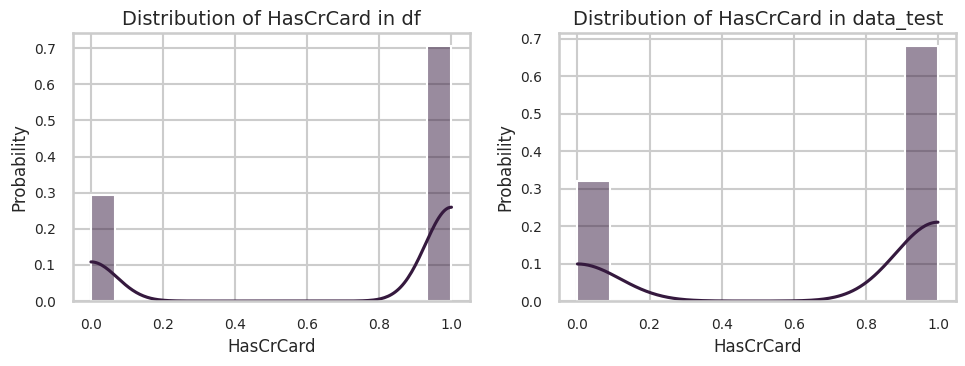

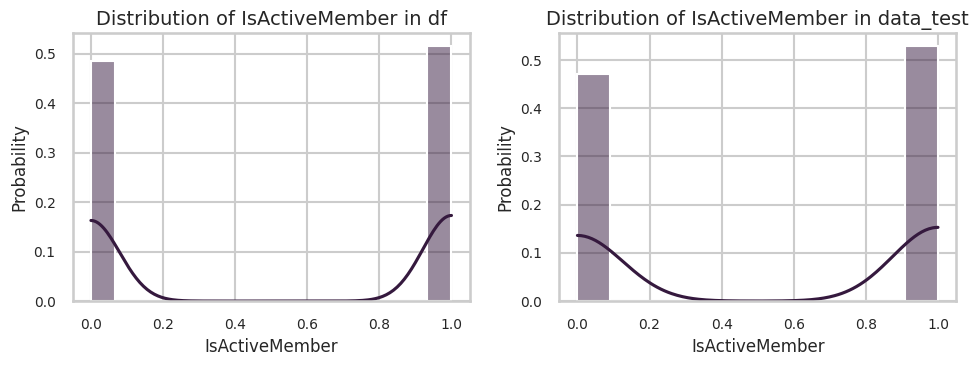

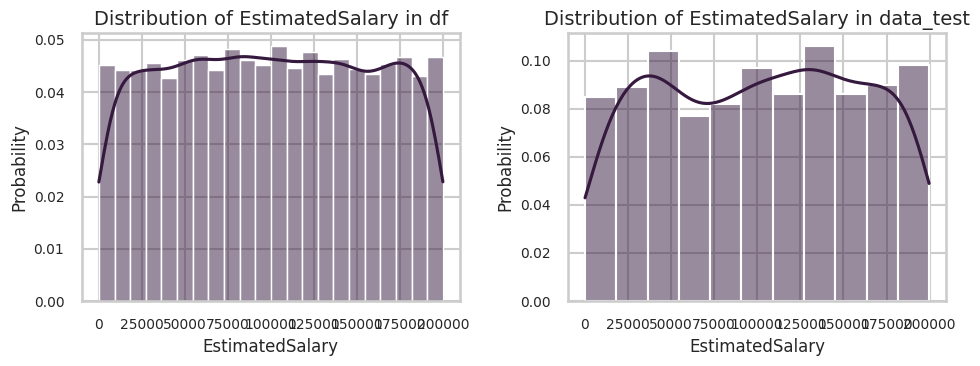

In [77]:
format_seaborn_plots()

# Exclude 'Exited' from df
df_features = df.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1).columns

# Plot the distribution of each feature in df and data_test
for feature in df_features:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, stat='probability')
    plt.title(f'Distribution of {feature} in df')

    plt.subplot(1, 2, 2)
    sns.histplot(data_test[feature], kde=True, stat='probability')
    plt.title(f'Distribution of {feature} in data_test')

    plt.tight_layout()
    plt.show()
